## 1.  Understand the Problem Statement & Import Packages and Datasets :

In [1]:
# Import Required Python Packages :

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scientific and Data Manipulation Libraries :

import numpy as np
import pandas as pd

# Data Viz & Regular Expression Libraries :

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns

# Scikit-Learn ML Libraries :

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *

# Garbage Collection Libraries :

import gc

# Boosting Algorithm Libraries :

from sklearn.tree                     import DecisionTreeClassifier
from xgboost                          import XGBRegressor
from catboost                         import CatBoostRegressor
from lightgbm                         import LGBMRegressor
from sklearn.ensemble                 import ExtraTreesClassifier, VotingClassifier

# Date & Time Libraries :
from datetime import datetime
import time

In [2]:
train = pd.read_csv('train_ML_IOT.csv')
test = pd.read_csv('test_ML_IOT.csv')
ss = pd.read_csv('sample_submission_ML_IOT.csv')

## 2. Perform EDA (Exploratory Data Analysis) - Understanding the Datasets :    

### 2.1 Explore Train and Test Data and get to know what each Column / Feature denotes :

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  11808 non-null  object
 1   Junction  11808 non-null  int64 
 2   ID        11808 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 276.9+ KB


In [5]:
train.sample(10)

,DateTime,Junction,Vehicles,ID
21572,2016-08-17 20:00:00,2,21,20160817202
22045,2016-09-06 13:00:00,2,17,20160906132
13867,2017-05-31 19:00:00,1,100,20170531191
37150,2016-09-27 22:00:00,3,31,20160927223
32334,2016-03-11 06:00:00,3,9,20160311063
21467,2016-08-13 11:00:00,2,9,20160813112
17955,2016-03-20 03:00:00,2,10,20160320032
31348,2016-01-30 04:00:00,3,7,20160130043
1368,2015-12-28 00:00:00,1,14,20151228001
36536,2016-09-02 08:00:00,3,14,20160902083


In [6]:
test.sample(10)

,DateTime,Junction,ID
10744,2017-09-17 16:00:00,4,20170917164
7250,2017-08-26 02:00:00,3,20170826023
163,2017-07-07 19:00:00,1,20170707191
1849,2017-09-16 01:00:00,1,20170916011
7314,2017-08-28 18:00:00,3,20170828183
10852,2017-09-22 04:00:00,4,20170922044
5481,2017-10-14 09:00:00,2,20171014092
6984,2017-08-15 00:00:00,3,20170815003
3606,2017-07-28 06:00:00,2,20170728062
8544,2017-10-19 00:00:00,3,20171019003


In [7]:
train.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [8]:
test.describe()

,Junction,ID
count,11808.000000,1.180800e+04
mean,2.500000,2.017087e+10
std,1.118081,1.124665e+05
min,1.000000,2.017070e+10
25%,1.750000,2.017073e+10
50%,2.500000,2.017083e+10
75%,3.250000,2.017100e+10
max,4.000000,2.017103e+10


In [9]:
train.dtypes

DateTime    object
Junction     int64
Vehicles     int64
ID           int64
dtype: object

Display Data Information of "train"

In [10]:
def display_data_information(data, data_types, dataframe_name):
    print(" Information of ",dataframe_name,": Rows = ",data.shape[0],"| Columns = ",data.shape[1],"\n")
    data.info()
    print("\n")
    for VARIABLE in data_types :
        data_type = data.select_dtypes(include=[ VARIABLE ]).dtypes
        if len(data_type) > 0 :
            print(str(len(data_type))+" "+VARIABLE+" Features\n"+str(data_type)+"\n"  )        


data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]
display_data_information(train, data_types, "Train")

 Information of  Train : Rows =  48120 | Columns =  4 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


3 int64 Features
Junction    int64
Vehicles    int64
ID          int64
dtype: object

1 object Features
DateTime    object
dtype: object


Display Data Information of "test"

In [11]:
data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]
display_data_information(test, data_types, "Test")

 Information of  Test : Rows =  11808 | Columns =  3 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  11808 non-null  object
 1   Junction  11808 non-null  int64 
 2   ID        11808 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 276.9+ KB


2 int64 Features
Junction    int64
ID          int64
dtype: object

1 object Features
DateTime    object
dtype: object


Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)

In [12]:
def display_head_tail(data, head_rows, tail_rows):
    display("Data Head & Tail :")
    combined_data = pd.concat([data.head(head_rows), data.tail(tail_rows)])
    display(combined_data)

display_head_tail(train, head_rows=10, tail_rows=10)

'Data Head & Tail :'

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
5,2015-11-01 05:00:00,1,6,20151101051
6,2015-11-01 06:00:00,1,9,20151101061
7,2015-11-01 07:00:00,1,8,20151101071
8,2015-11-01 08:00:00,1,11,20151101081
9,2015-11-01 09:00:00,1,12,20151101091


In [13]:
display_head_tail(test, head_rows=3, tail_rows=2)

'Data Head & Tail :'

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
11806,2017-10-31 22:00:00,4,20171031224
11807,2017-10-31 23:00:00,4,20171031234


In [14]:
def display_data_description(data, numeric_data_types, categorical_data_types):
    
    print("Data Description :")
    display(data.describe( include = numeric_data_types))
    display(data.describe( include = categorical_data_types))

display_data_description(train, data_types[0:4], data_types[4:7])

Data Description :


,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


,DateTime
count,48120
unique,14592
top,2017-06-30 23:00:00
freq,4


In [15]:
display_data_description(test, data_types[0:4], data_types[4:7])

Data Description :


,Junction,ID
count,11808.000000,1.180800e+04
mean,2.500000,2.017087e+10
std,1.118081,1.124665e+05
min,1.000000,2.017070e+10
25%,1.750000,2.017073e+10
50%,2.500000,2.017083e+10
75%,3.250000,2.017100e+10
max,4.000000,2.017103e+10


,DateTime
count,11808
unique,2952
top,2017-07-01 00:00:00
freq,4


Checking Percentage(%) of Common ID's  between train and test data using Unique train values :

In [16]:
np.intersect1d(train['ID'], test['ID']).shape[0]/train['ID'].nunique() # # No Common ID in train and test data

0.0

Dropping "ID" Columns in Train and Test :

In [17]:
train.drop(["ID"],axis = 1,inplace=True)

test_ID = test["ID"]
test.drop(["ID"],axis = 1,inplace=True)
train.shape, test.shape

((48120, 3), (11808, 2))

## 3.  Remove Duplicate Rows from Train data if present :

In [18]:
def remove_duplicate(data):
    
    print("BEFORE REMOVING DUPLICATES = ",data.shape[0])
    data.drop_duplicates(keep="first", inplace=True) 
    print("AFTER REMOVING DUPLICATES = ",data.shape[0])
    
    return data

train = remove_duplicate(train) # No Duplicates are there to remove

BEFORE REMOVING DUPLICATES =  48120
AFTER REMOVING DUPLICATES =  48120


## 4.  Fill/Impute Missing Values in Train and Test :

Fills or Imputes Missing values with Various Methods : 

In [19]:
def fill_missing_values(data, fill_value, fill_types, columns, dataframe_name):
    
    print("Missing Values BEFORE REMOVAL in ",dataframe_name," data")
    display((data.isnull().sum()).sum())
    
    if (data.isnull().sum()).sum() != 0 :
    
        for column in columns :

            # Fill Missing Values with Specific Value :
            if "Value_Fill" in fill_types :
                data[ column ] = data[ column ].fillna(fill_value)

            # Fill Missing Values with Forward Fill  (Previous Row Value as Current Row in Table) :
            if "Forward_Fill" in fill_types :
                data[ column ] = data[ column ].ffill(axis = 0)

            # Fill Missing Values with Backward Fill (Next Row Value as Current Row in Table) :
            if "Backward_Fill" in fill_types :
                data[ column ] = data[ column ].bfill(axis = 0)

        print("Missing Values AFTER REMOVAL in ",dataframe_name," data")
        display(data.isnull().sum())
    
    return data

fill_types = [ "Forward_Fill"]
fill_value = 0

train = fill_missing_values(train, fill_value, fill_types, train.columns,"train")

test  = fill_missing_values(test, fill_value, fill_types,train.columns,"test")

Missing Values BEFORE REMOVAL in  train  data


0

Missing Values BEFORE REMOVAL in  test  data


0

In [20]:
train.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
dtype: int64

Displays Unique Values in Each Column of the Dataframe(Table) :

In [21]:
def display_unique(data):
    for column in data.columns :
        
        print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
        print("Actual Unique Values in "+column+" Column are : "+str(data[column].sort_values(ascending=True,na_position='last').unique() ))
        print("NULL Values :")
        print(data[ column ].isnull().sum())
        print("Value Counts :")
        print(data[column].value_counts())
        print("")
        
display_unique(train)

No of Unique Values in DateTime Column are : 14592
Actual Unique Values in DateTime Column are : ['2015-11-01 00:00:00' '2015-11-01 01:00:00' '2015-11-01 02:00:00' ...
 '2017-06-30 21:00:00' '2017-06-30 22:00:00' '2017-06-30 23:00:00']
NULL Values :
0
Value Counts :
DateTime
2017-06-30 23:00:00    4
2017-03-02 02:00:00    4
2017-03-02 16:00:00    4
2017-03-02 15:00:00    4
2017-03-02 14:00:00    4
                      ..
2016-05-21 19:00:00    3
2016-05-21 20:00:00    3
2016-05-21 21:00:00    3
2016-05-21 22:00:00    3
2016-08-31 00:00:00    3
Name: count, Length: 14592, dtype: int64

No of Unique Values in Junction Column are : 4
Actual Unique Values in Junction Column are : [1 2 3 4]
NULL Values :
0
Value Counts :
Junction
1    14592
2    14592
3    14592
4     4344
Name: count, dtype: int64

No of Unique Values in Vehicles Column are : 141
Actual Unique Values in Vehicles Column are : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24 

In [22]:
display_unique(test)

No of Unique Values in DateTime Column are : 2952
Actual Unique Values in DateTime Column are : ['2017-07-01 00:00:00' '2017-07-01 01:00:00' '2017-07-01 02:00:00' ...
 '2017-10-31 21:00:00' '2017-10-31 22:00:00' '2017-10-31 23:00:00']
NULL Values :
0
Value Counts :
DateTime
2017-07-01 00:00:00    4
2017-09-21 03:00:00    4
2017-09-20 18:00:00    4
2017-09-20 19:00:00    4
2017-09-20 20:00:00    4
                      ..
2017-08-11 02:00:00    4
2017-08-11 03:00:00    4
2017-08-11 04:00:00    4
2017-08-11 05:00:00    4
2017-10-31 23:00:00    4
Name: count, Length: 2952, dtype: int64

No of Unique Values in Junction Column are : 4
Actual Unique Values in Junction Column are : [1 2 3 4]
NULL Values :
0
Value Counts :
Junction
1    2952
2    2952
3    2952
4    2952
Name: count, dtype: int64


In [23]:
train_data = train.copy()
train_data["DateTime"]= pd.to_datetime(train_data["DateTime"])

test['DateTime'] = pd.to_datetime(test['DateTime'])
test_data = test.set_index('DateTime')

train_data.info

<bound method DataFrame.info of                  DateTime  Junction  Vehicles
0     2015-11-01 00:00:00         1        15
1     2015-11-01 01:00:00         1        13
2     2015-11-01 02:00:00         1        10
3     2015-11-01 03:00:00         1         7
4     2015-11-01 04:00:00         1         9
...                   ...       ...       ...
48115 2017-06-30 19:00:00         4        11
48116 2017-06-30 20:00:00         4        30
48117 2017-06-30 21:00:00         4        16
48118 2017-06-30 22:00:00         4        22
48119 2017-06-30 23:00:00         4        12

[48120 rows x 3 columns]>

Text(0.5, 0, 'Date')

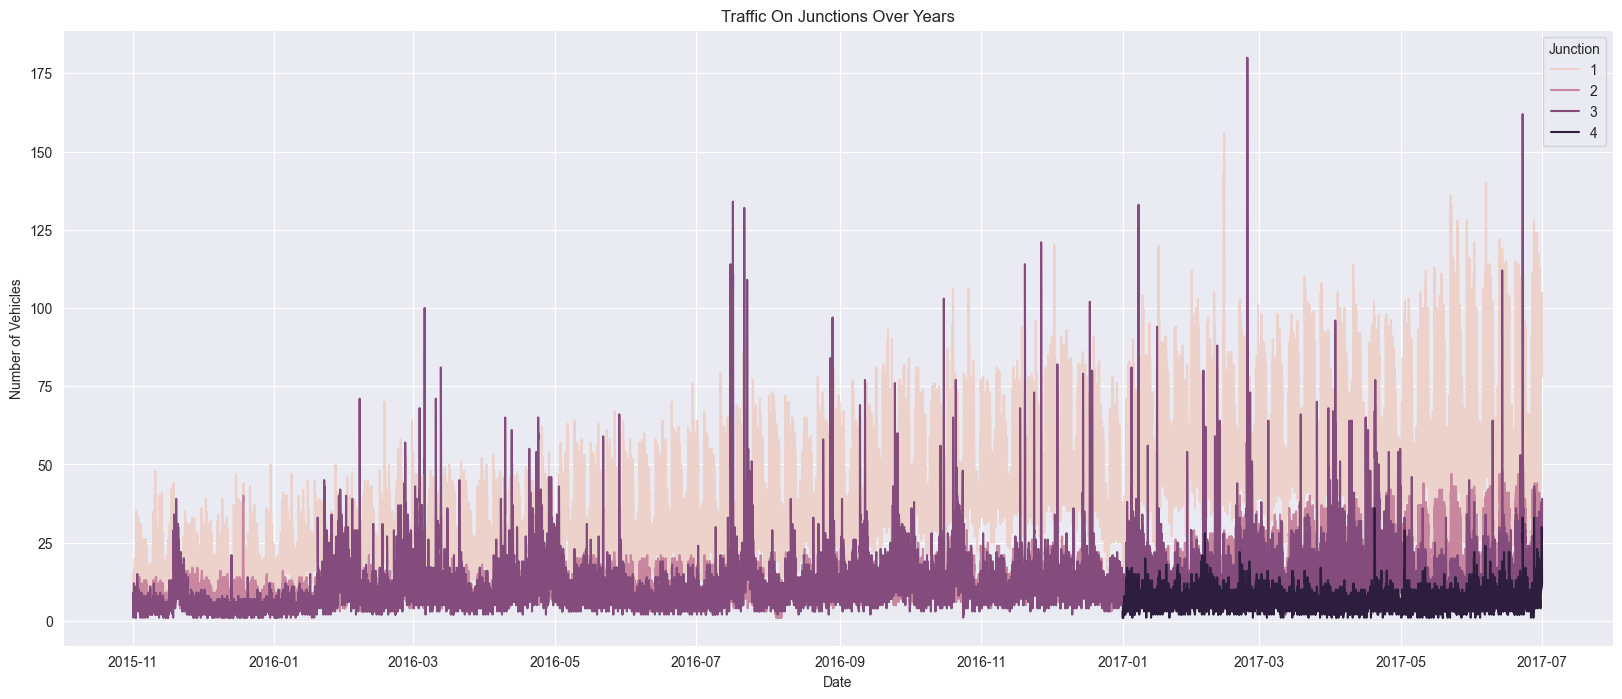

In [24]:
df=train_data.copy() 
plt.figure(figsize=(20,8))
Time_series=sns.lineplot(x=df['DateTime'],y="Vehicles",data=df, hue="Junction")
Time_series.set_title("Traffic On Junctions Over Years")
Time_series.set_ylabel("Number of Vehicles")
Time_series.set_xlabel("Date")

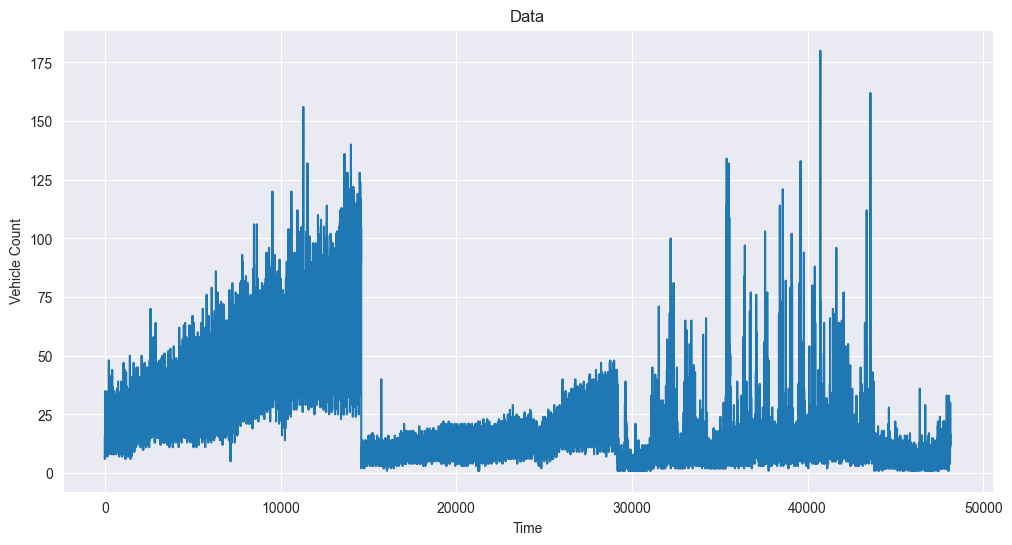

In [25]:
dataset = train.set_index('DateTime')

plt.figure(figsize=(12, 6))
plt.plot(train['Vehicles'])
plt.title('Data')
plt.xlabel('Time')
plt.ylabel('Vehicle Count')
plt.grid(True)
plt.show()

In [26]:
test_data.reset_index(drop=True, inplace=True)
ss.reset_index(drop=True, inplace=True)
test_data = pd.concat([test_data, ss], axis=1)
test_data

,Junction,ID,Vehicles
0,1,20170701001,50
1,1,20170701011,50
2,1,20170701021,50
3,1,20170701031,50
4,1,20170701041,50
...,...,...,...
11803,4,20171031194,50
11804,4,20171031204,50
11805,4,20171031214,50
11806,4,20171031224,50


## Train the LSTM model and make predictions

In [27]:
junctions = train_data['Junction'].unique()


test_predictions = {}

for junction in junctions:
    # Veriyi Junction'a göre ayırma
    train_data_junction = train_data[train_data['Junction'] == junction]
    test_data_junction = test_data[test_data['Junction'] == junction]
    
    # Veriyi normalleştirme
    scaler = MinMaxScaler()
    train_data_normalized = scaler.fit_transform(train_data_junction[['Vehicles']])
    
    # LSTM için veriyi hazırlama
    X_train, y_train = [], []
    for i in range(24, len(train_data_normalized)):
        X_train.append(train_data_normalized[i-24:i, 0])
        y_train.append(train_data_normalized[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    
    # LSTM modelini oluşturma
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, batch_size=32)
    

    # Test verilerini tahmin etme
    inputs = test_data_junction['Vehicles'].values
    inputs = scaler.transform(inputs.reshape(-1, 1))
    X_test = []
    for i in range(24, len(inputs)):
        X_test.append(inputs[i-24:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted_vehicles = model.predict(X_test)
    predicted_vehicles = scaler.inverse_transform(predicted_vehicles)
    
    # Tahminleri bir sözlükte saklama
    test_predictions[junction] = predicted_vehicles.flatten()


Epoch 1/50
456/456 [==============================] - 7s 11ms/step - loss: 0.0063
Epoch 2/50
456/456 [==============================] - 5s 11ms/step - loss: 0.0018
Epoch 3/50
456/456 [==============================] - 5s 10ms/step - loss: 0.0014
Epoch 4/50
456/456 [==============================] - 5s 10ms/step - loss: 0.0013
Epoch 5/50
456/456 [==============================] - 5s 10ms/step - loss: 0.0013
Epoch 6/50
456/456 [==============================] - 5s 10ms/step - loss: 0.0012
Epoch 7/50
456/456 [==============================] - 5s 12ms/step - loss: 0.0012
Epoch 8/50
456/456 [==============================] - 5s 12ms/step - loss: 0.0011
Epoch 9/50
456/456 [==============================] - 5s 11ms/step - loss: 0.0011
Epoch 10/50
456/456 [==============================] - 5s 12ms/step - loss: 0.0011
Epoch 11/50
456/456 [==============================] - 5s 11ms/step - loss: 0.0010
Epoch 12/50
456/456 [==============================] - 5s 11ms/step - loss: 0.0010
Epoch 13/50
4

C:\Users\Stajyer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


92/92 [==============================] - 1s 4ms/step
Epoch 1/50
456/456 [==============================] - 7s 11ms/step - loss: 0.0070
Epoch 2/50
456/456 [==============================] - 5s 11ms/step - loss: 0.0035
Epoch 3/50
456/456 [==============================] - 5s 11ms/step - loss: 0.0032
Epoch 4/50
456/456 [==============================] - 5s 11ms/step - loss: 0.0032
Epoch 5/50
456/456 [==============================] - 5s 11ms/step - loss: 0.0031
Epoch 6/50
456/456 [==============================] - 5s 11ms/step - loss: 0.0030
Epoch 7/50
456/456 [==============================] - 5s 11ms/step - loss: 0.0030
Epoch 8/50
456/456 [==============================] - 5s 11ms/step - loss: 0.0030
Epoch 9/50
456/456 [==============================] - 5s 11ms/step - loss: 0.0030
Epoch 10/50
456/456 [==============================] - 5s 12ms/step - loss: 0.0030
Epoch 11/50
456/456 [==============================] - 6s 12ms/step - loss: 0.0030
Epoch 12/50
117/456 [======>...............

KeyboardInterrupt: 

In [ ]:
# Tahminleri görselleştirme
for junction in junctions:
    plt.figure(figsize=(12, 6))
    plt.plot(test_data[test_data['Junction'] == junction]['Vehicles'], label='Gerçek Veri', color='blue')
    plt.plot(test_predictions[junction], label='Tahmin', color='red')
    plt.title(f'Junction {junction} Test Verileri ve Tahminleri')
    plt.xlabel('Zaman')
    plt.ylabel('Araç Sayısı')
    plt.legend()
    plt.grid(True)
    plt.show()